In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import feather
import seaborn as sns
import os
import sys
import glob
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


In [11]:
df = pd.read_csv('../event_data.csv.zip',compression='zip')

In [13]:
df.tail(10)

,Event_ID,Event_Date,Event_Type,Name,Ticker,20D_Future_Excess_Return,40D_Future_Excess_Return,60D_Future_Excess_Return,Sector,Industry_Group,Region,Country,Multi-Factor_Score,BK_Yield,Sales_Yield,Earnings_Yield_LTM,CASHFLOW_YIELD,Trailing_20_Day_Return,Trailing_40_Day_Return,Trailing_60_Day_Return,Trailing_120_Day_Return,Trailing_180_Day_Return,Trailing_20_Day_Estimate_Revision_Change,Trailing_60_Day_Estimate_Revision_Change,Trailing_120_Day_Estimate_Revision_Change,ROE,ROIC,ROA,GROSS_MGN,Trailing_240_Day_Volatility,Trailing_20_Day_Volatility,Trailing_720_Day_Beta,Trailing_240_Day_Beta,Next_Fiscal_Report_Date,Event_Return,SD_From_Peer_Group,Size_Group,Event_Context
106730,6111365,20171208,Negative,Clean Teq Holdings Limited,CLQ-AU,17.665938,NaN,NaN,Industrials,Commercial & Professional Services,Asia Pacific,AUSTRALIA,100.0,0.160116,0.000542,-0.020052,-0.002102,-22.685379,24.438250,94.788670,39.311910,177.331020,-3.500000,-16.416668,-27.069660,-17.903297,-54.302765,-16.531885,-2375.827000,4.534790,4.293604,0.513427,2.999679,20180823.0,-7.552397,-5.243302,SMALL,Sales/Revenue Release
106731,6111580,20171208,Positive,"TMAC Resources, Inc.",TMR-CA,22.680103,NaN,NaN,Materials,Materials,Americas,CANADA,100.0,1.170134,0.035866,-0.027975,-0.144851,4.323912,-7.479405,-46.342827,-40.916626,-43.708960,-117.330190,-137.764140,-111.119200,-2.483658,-2.295343,-1.820249,-23.989363,3.434671,4.863891,NaN,NaN,20180223.0,12.257469,6.753649,SMALL,Sales/Revenue Release
106732,6111652,20171208,Positive,Science Applications International Corp.,SAIC,-6.086442,NaN,NaN,Information Technology,Software & Services,Americas,UNITED STATES,34.0,0.092364,1.249572,0.046517,0.076714,9.040093,8.662701,6.053424,-6.979424,-1.647091,0.000000,-1.761533,-7.056612,47.383720,12.100965,7.978463,9.627401,2.045828,1.715559,1.346490,2.503197,20180328.0,6.018829,4.683239,SMALL,Earnings Release
106733,6111833,20171208,Positive,Washington Prime Group Inc.,WPG,0.831241,NaN,NaN,Real Estate,Real Estate,Americas,UNITED STATES,75.0,0.683185,0.605698,0.121255,0.222700,-7.279688,-13.053894,-1.572734,-13.592232,-20.059877,0.000000,0.000000,NaN,15.707927,3.709276,3.540455,30.368114,2.051413,2.012865,1.008065,0.617362,20180222.0,4.160476,4.430757,SMALL,Sales/Revenue Release
106734,6112119,20171208,Positive,Magazine Luiza S.A.,MGLU3-BR,7.057512,NaN,NaN,Consumer Discretionary,Retailing,Latin America,BRAZIL,22.0,0.068156,0.874332,0.022556,0.028274,8.538448,-6.265539,118.611595,153.409270,451.340480,10.099752,10.090263,30.581385,34.594020,18.588514,4.792542,28.967361,4.613841,4.098046,1.125401,1.430444,20180222.0,8.260071,4.812961,SMALL,Analyst/Investor Meeting
106735,6112410,20171208,Negative,Sapura Energy Bhd,5218-MY,10.520243,NaN,NaN,Energy,Energy,Asia,MALAYSIA,80.0,2.396258,1.245066,-0.074372,0.408179,-46.278667,-37.170030,-50.904950,-51.982690,-36.272835,-3.268628,-26.894854,-132.175690,-3.136349,-1.387291,-1.110253,6.226793,2.796285,5.418714,2.047709,2.419940,20180328.0,-14.000154,-5.317809,MID,Earnings Release
106736,6112544,20171208,Negative,"Party City Holdco, Inc.",PRTY,9.818594,NaN,NaN,Consumer Discretionary,Retailing,Americas,UNITED STATES,32.0,0.722375,1.576607,0.077733,0.174855,10.762334,-11.469531,-25.377638,-14.532870,-23.052956,-3.680752,-3.680752,-2.772515,11.495870,4.481578,3.271013,40.307026,2.669034,5.191094,1.332644,0.579708,20180308.0,-7.835817,-4.453574,SMALL,Sales/Revenue Release
106737,6112680,20171208,Positive,Genscript Biotech Corporation,1548-HK,131.867943,NaN,NaN,Health Care,Pharmaceuticals Biotechnology & Life Sciences,Asia,HONG KONG,69.0,0.078039,0.053649,0.012266,0.015045,10.127568,45.619870,218.016940,157.491550,160.507340,0.500000,0.000000,-6.445614,15.176734,15.832391,12.130579,66.399140,4.595849,3.607405,0.316957,0.792725,20180319.0,11.139584,4.487496,SMALL,Sales/Revenue Release
106738,6112837,20171208,Positive,China Rapid Finance Limited Sponsored ADR Class A,XRF,-7.415055,NaN,NaN,Information Technology,Software & Services,Asia,CHINA,99.0,0.160605,0.184

In [16]:
# Converting to Date time Format
df['Event_Date']= pd.to_datetime(df['Event_Date'],format = '%Y%m%d')

In [17]:
# Distribution of Output Variables
df['Event_Type'].value_counts()/len(df)

Positive    0.626803
Negative    0.373197
Name: Event_Type, dtype: float64

In [5]:
df.shape

(106740, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106740 entries, 0 to 106739
Data columns (total 38 columns):
Event_ID                                     106740 non-null int64
Event_Date                                   106740 non-null int64
Event_Type                                   106740 non-null object
Name                                         106740 non-null object
Ticker                                       106740 non-null object
20D_Future_Excess_Return                     106740 non-null float64
40D_Future_Excess_Return                     105196 non-null float64
60D_Future_Excess_Return                     103057 non-null float64
Sector                                       106740 non-null object
Industry_Group                               106740 non-null object
Region                                       106740 non-null object
Country                                      106740 non-null object
Multi-Factor_Score                           96328 non-null float64
BK_Y

In [19]:
df.describe(include = 'all')

,Event_ID,Event_Date,Event_Type,Name,Ticker,20D_Future_Excess_Return,40D_Future_Excess_Return,60D_Future_Excess_Return,Sector,Industry_Group,Region,Country,Multi-Factor_Score,BK_Yield,Sales_Yield,Earnings_Yield_LTM,CASHFLOW_YIELD,Trailing_20_Day_Return,Trailing_40_Day_Return,Trailing_60_Day_Return,Trailing_120_Day_Return,Trailing_180_Day_Return,Trailing_20_Day_Estimate_Revision_Change,Trailing_60_Day_Estimate_Revision_Change,Trailing_120_Day_Estimate_Revision_Change,ROE,ROIC,ROA,GROSS_MGN,Trailing_240_Day_Volatility,Trailing_20_Day_Volatility,Trailing_720_Day_Beta,Trailing_240_Day_Beta,Next_Fiscal_Report_Date,Event_Return,SD_From_Peer_Group,Size_Group,Event_Context
count,1.067400e+05,106740,106740,106740,106740,106740.000000,105196.000000,103057.000000,106740,106740,106740,106740,96328.000000,103975.000000,103949.000000,103795.000000,101950.000000,106445.000000,106304.000000,105787.000000,104796.000000,103607.000000,90449.000000,8.944200e+04,8.064900e+04,103186.000000,103483.000000,103533.000000,97154.000000,104213.000000,104209.000000,97489.000000,97489.000000,1.064050e+05,106740.000000,106740.000000,106740,104702
unique,NaN,2078,2,11961,11824,NaN,NaN,NaN,11,24,7,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8
top,NaN,2017-04-17 00:00:00,Positive,Energy World Corporation Ltd,U-TH,NaN,NaN,NaN,Industrials,Capital Goods,Americas,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMALL,Sales/Revenue Release
freq,NaN,86,66905,248,287,NaN,NaN,NaN,18250,12740,40803,37371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95667,87576
first,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.256827e+07,NaN,NaN,NaN,NaN,-0.977412,-1.923540,-2.563408,NaN,NaN,NaN,NaN,59.480816,3.275078,3.445705,-0.705792,0.493955,2.825087,2.536403,5.276676,11.763160,21.213526,-5.272607,-4.659560e+05,-6.899929e+05,-20.226415,-7.272575,-1.151430,-247.226318,4.247732,4.504839,1.545361,1.602679,2.014355e+07,3.007226,1.394270,NaN,NaN
std,7.372166e+06,NaN,NaN,NaN,NaN,18.841871,25.413136,34.303524,NaN,NaN,NaN,NaN,30.138519,638.265170,56.790522,13.409169,86.813326,32.068256,46.563474,68.735040,99.334338,135.608493,66.471683,8.045171e+07,9.888616e+07,1288.877871,686.645814,42.303075,7750.641846,154.730832,155.618606,85.623691,85.622372,2.328556e+04,14.321104,5.695312,NaN,NaN
min,2.022000e+03,NaN,NaN,NaN,NaN,-106.092166,-130.008324,-188.823688,NaN,NaN,NaN,NaN,1.000000,-542.099700,-133.550450,-1462.931200,-1844.053300,-99.155110,-99.335220,-99.750660,-99.771670,-99.842660,-9262.499000,-1.389154e+10,-1.748665e+10,-248335.140000,-38992.470000,-1015.114560,-742411.100000,0.158422,0.000000,-2542.377200,-2542.377200,2.010011e+07,-97.406590,-18.489533,NaN,NaN
25%,5.931872e+06,NaN,NaN,NaN,NaN,-9.343762,-13.691303,-20.468258,NaN,NaN,NaN,NaN,34.000000,0.267089,0.282327,-0.066904,0.008346,-15.361601,-23.421726,-31.091720,-35.837125,-39.027083,-2.799768,-1.578578e+01,-3.425277e+01,-10.354751,-6.342227,-3.439530,12.816350,2.297461,2.015533,0.838337,0.778489,2.012053e+07,-8.332174,-4.552807,NaN,NaN


In [11]:
df.isnull().sum()

Event_ID                                         0
Event_Date                                       0
Event_Type                                       0
Name                                             0
Ticker                                           0
20D_Future_Excess_Return                         0
40D_Future_Excess_Return                      1544
60D_Future_Excess_Return                      3683
Sector                                           0
Industry_Group                                   0
Region                                           0
Country                                          0
Multi-Factor_Score                           10412
BK_Yield                                      2765
Sales_Yield                                   2791
Earnings_Yield_LTM                            2945
CASHFLOW_YIELD                                4790
Trailing_20_Day_Return                         295
Trailing_40_Day_Return                         436
Trailing_60_Day_Return         

In [25]:
# PLotting Few Varible's distribution against Output Varibles
def plot_violin(data,feature,ylim0,ylim1):
    fig,ax = plt.subplots(1,figsize = (12,8))
    sns.violinplot(data = data,x = 'Event_Type',y = feature,ax =ax)
    ax.set_xlabel('Event Type',fontsize = 15)
    ax.set_ylabel(feature,fontsize = 15)
    ax.set_title("Distribution of %s vs Event Type"% feature,fontsize = 25)
    ax.set_ylim(ylim0,ylim1)

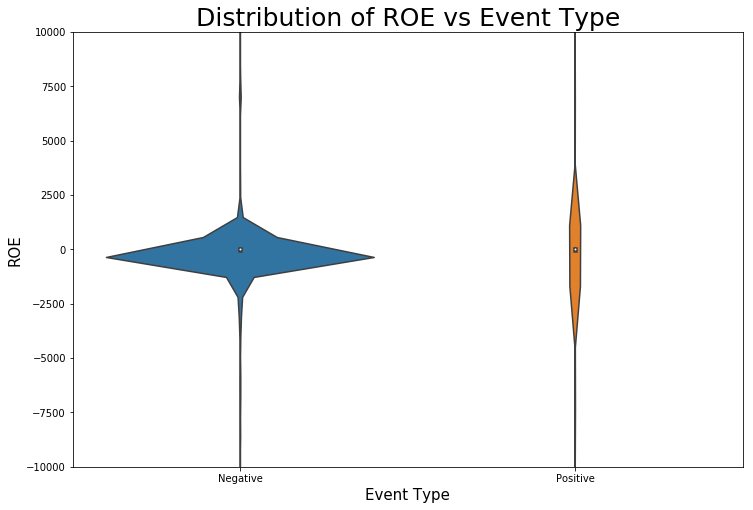

In [26]:
plot_violin(df,'ROE',ylim0 = -10000,ylim1=10000)


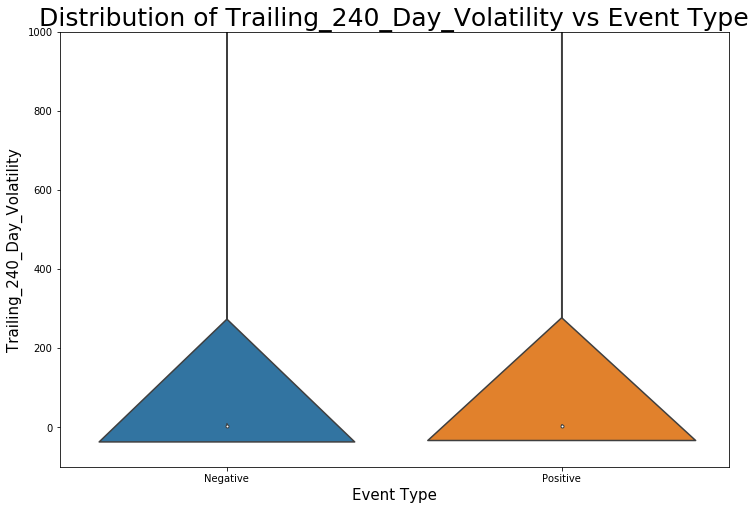

In [30]:
plot_violin(df,'Trailing_240_Day_Volatility',ylim0 = -100,ylim1=1000)

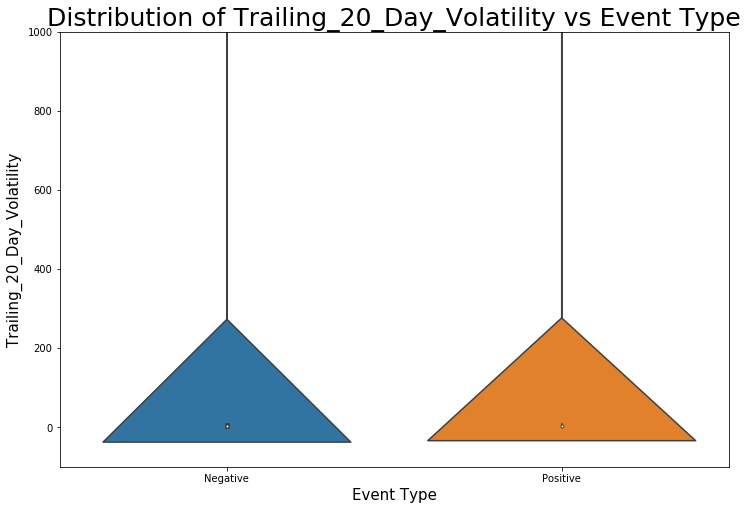

In [31]:
plot_violin(df,'Trailing_20_Day_Volatility',ylim0 = -100,ylim1=1000)

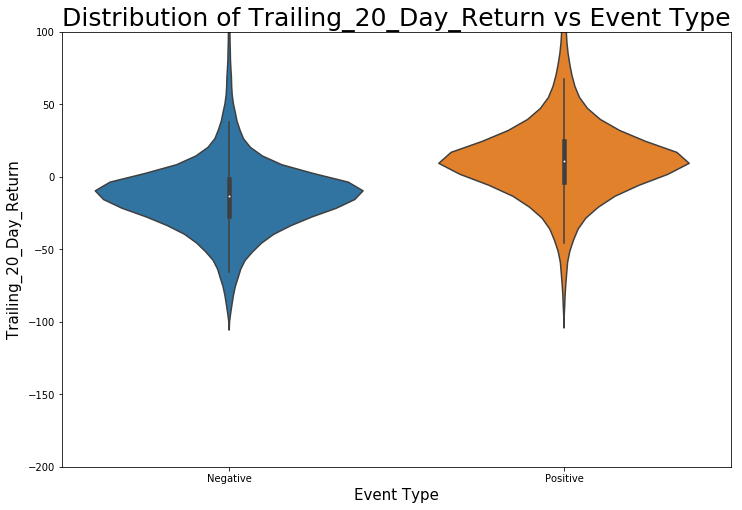

In [33]:
plot_violin(df,'Trailing_20_Day_Return',ylim0 = -200,ylim1=100)

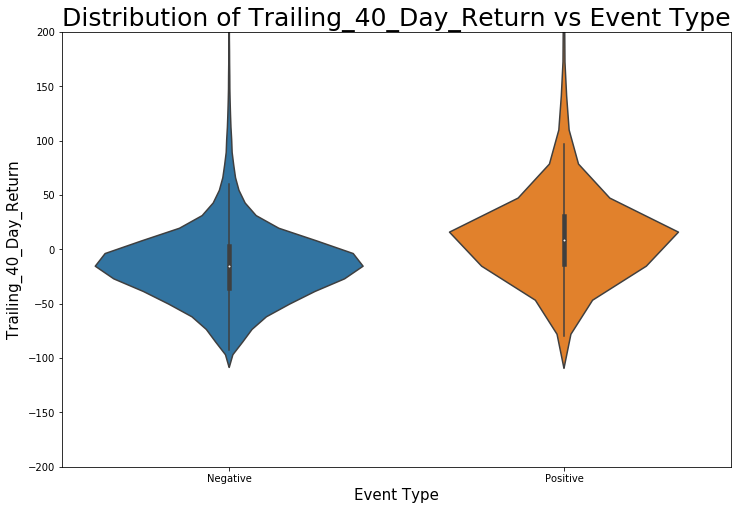

In [35]:
plot_violin(df,'Trailing_40_Day_Return',ylim0 = -200,ylim1=200)

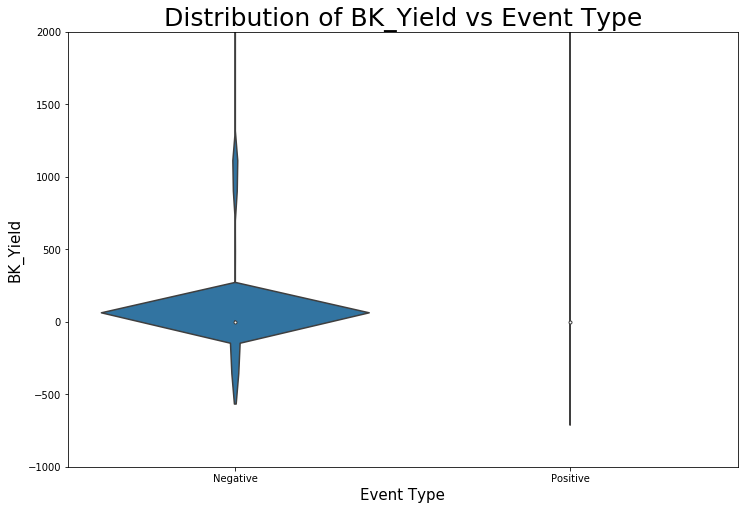

In [37]:
plot_violin(df,'BK_Yield',ylim0 = -1000,ylim1=2000)